**Machine Learning Fine Tuning**

Uma vez escolhido o algoritmo de machine Learning, decidiu-se analisar quais seriam os melhores hiperparametros para que o modelo apresentasse melhor performance, utilizando o GridSearchCV.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_csv('x_y_ml_rg_data.csv')
df = df.dropna()
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_active,bioactivity_inactive,bioactivity_intermediate,pic50
0,CHEMBL39380,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000
1,CHEMBL39003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000
2,CHEMBL39102,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.000000
3,CHEMBL16120,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.322219
4,CHEMBL267332,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,CHEMBL5220792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.352183
22048,CHEMBL5219051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.342423
22049,CHEMBL5219808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.041393
22050,CHEMBL4520920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.633468


In [4]:
selection = ['Name','bioactivity_active','bioactivity_intermediate','bioactivity_inactive','pic50']
X = df.drop(selection, axis=1)
X.shape

(22035, 881)

In [5]:
from sklearn.feature_selection import VarianceThreshold
select = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = select.fit_transform(X)
X.shape

(22035, 184)

In [6]:
y = df['pic50']
y.shape

(22035,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [103]:
param_grid = dict(n_estimators= [10,50,100,150,200,250],
                  max_depth = [None,1,5,10,15,20])

In [104]:
rfr = RandomForestRegressor(n_estimators=100,
                            )

rfr.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
rfr.score(X_train,y_train)

0.8715330172076318

In [106]:
rfr.score(X_test,y_test)

0.6338623565116824

In [107]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
grid_search = GridSearchCV(rfr,param_grid)

In [109]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150, 200, 250]})

In [110]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 250}

In [117]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by = 'mean_test_score',ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['mean_test_score','param_max_depth','param_n_estimators','mean_fit_time']].head(10)

,mean_test_score,param_max_depth,param_n_estimators,mean_fit_time
0,0.596731,20,250,77.161485
1,0.596273,20,150,48.483652
2,0.595390,None,200,54.275214
3,0.595357,20,200,60.619741
4,0.595144,None,250,67.915940
5,0.594638,None,150,118.447259
6,0.594455,None,100,27.133114
7,0.592480,20,100,41.004065
8,0.591399,15,200,42.331961
9,0.591207,15,250,78.545185


O sexto colocado foi selecionado por possuir o menor tempo de computação, comparando-se com os outros, a pontuação não possui diferença significativa.

In [8]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 10, shuffle = True, random_state=7)

rfr = RandomForestRegressor(n_estimators=100 , max_depth=None , random_state=7)
results = cross_val_score(rfr,X_train,y_train, cv = kfold)
results



array([0.60488506, 0.59303111, 0.56368098, 0.50154383, 0.63568806,
       0.60350375, 0.62441804, 0.6478921 , 0.60419213, 0.59965947])

In [13]:
print(f'Cross validation score: {results.mean():.2f}')

Cross validation score: 0.60


In [12]:
rfr.fit(X_train,y_train)
predictions = rfr.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

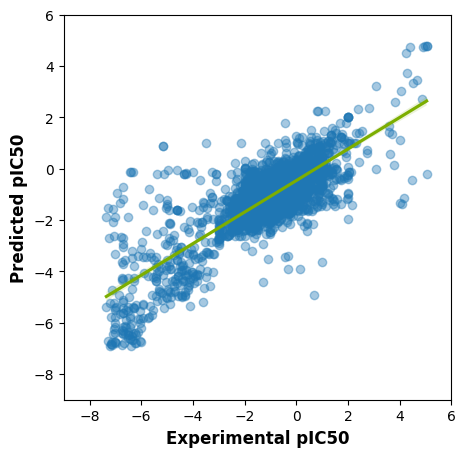

In [15]:
ax = sns.regplot(x=y_test,y= predictions,line_kws={"color":'#7CAE00'}, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(-9, 6)
ax.set_ylim(-9, 6)
ax.figure.set_size_inches(5, 5)
plt.show